In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import ipywidgets as widgets
from ipywidgets import Layout, Button, Box
from traitlets import directional_link
#import pyvie as pv
#from scipy.integrate import solve_ivp




In [109]:
L1 = 1

L2 = 1

M1 = 1

M2 = 1

g = 9.81

def derivatives(y ,t , L1 , L2 , M1 , M2):
    
    theta1,theta2,w1,w2 = y
    
    theta1_derivative = w1
    
    w1_derivative = (M2*g*np.sin(theta2)*np.cos(theta1-theta2) - M2*np.sin(theta1-theta2)*(L1*w1**2*np.cos(theta1-theta2) + L2*w2**2) -
             (M1+M2)*g*np.sin(theta1)) / L1 / (M1 + M2*np.sin(theta1-theta2)**2)
    
    theta2_derivative = w2
    
    w2_derivative =  ((M1+M2)*(L1*w1**2*np.sin(theta1-theta2) - g*np.sin(theta2) + g*np.sin(theta1)*np.cos(theta1-theta2)) + 
             M2*L2*w2**2*np.sin(theta1-theta2)*np.cos(theta1-theta2)) / L2 / (M1 + M2*np.sin(theta1-theta2)**2)
    
    return(theta1_derivative,w1_derivative,theta2_derivative,w2_derivative)

def calc_E(y):
    """Return the total energy of the system."""

    theta1, theta2, w1, w2 = y.T
    V = -(M1+M2)*L1*g*np.cos(theta1) - M2*L2*g*np.cos(theta2)
    T = 0.5*M1*(L1*w1)**2 + 0.5*M2*((L1*w1)**2 + (L2*w2)**2 +
            2*L1*L2*w1*w2*np.cos(theta1-theta2))
    return T + V

tm = 20

dt = .01 

t = np.arange(0,tm+dt,dt)

theta1_0 = np.pi

theta2_0 = np.pi/4+.001

w1_0 = 0

w2_0 = 0

y0 = np.array([theta1_0 , theta2_0 ,w1_0 , w2_0])

y = odeint(derivatives, y0 , t , args=(L1, L2, M1, M2))



theta1 = y[:,0]

theta2 = y[:,1]

w1 = y[:,2]

w2 = y[:,3]
E=calc_E(y)
#plt.plot(t,E)
M1S = widgets.FloatText(min=0,max=100 , value =1,description='M1',continuous_update=False)
M2S = widgets.FloatText(min=0,max=100 , value =1,description='M2',continuous_update=False)
L1S = widgets.FloatText(min=0,max=100 , value =1,description='L1',continuous_update=False)
L2S = widgets.FloatText(min=0,max=100 , value =1,description='L2',continuous_update=False)


def update(value):
    


    M1=M1S.value
    M2=M2S.value
    L1=L1S.value
    L2=L2S.value
    x=odeint(derivatives, y0 , t, args=(L1, L2, M1, M2))
    theta1=x[:,0]
    theta2=x[:,1]
    w1=x[:,2]
    w2=x[:,3]
    E=calc_E(x)
    #xval=[]
    #yval=[]
    #file_name="L1={}_L2={}_M1={}_M2={}.jpg".format(L1,L2,M1,M2)
 
    plt.clf()
    
    plt.figure(1)
    plt.plot(t,theta1)
    plt.title('theta1 vs time')
    
   
   
    plt.figure(2)
    plt.plot(t,E)
    plt.title('Energy vs time')
    
    
    
plt.clf()
M1S.observe(update)
M2S.observe(update)  
L1S.observe(update)
L2S.observe(update)

items=[M1S,M2S,L1S,L2S]
box_layout = Layout(display='flex',
                    flex_flow='column', 
                    align_items='stretch', 
                    width='70%')
box_layout1 = Layout(display='flex',
                    flex_flow='column', 
                    align_items='flex-end', 
                    width='60%')
box = Box(children=items, layout=box_layout)
a= widgets.Dropdown(options=['M', 'L', 'g'],description='Help Menu:')
b= widgets.Text('mass of pendulum bob in kg')
c=widgets.Text('length of pendulum bob in m')
d=widgets.Text('acceleration due to gravity in m/s^2')

def transform(k):
    return {'M': 'mass of pendulum bob in kg', 'L': 'length of pendulum bob in m', 'g':'acceleration due to gravity in m/s^2'}[k]

directional_link((a, 'value'), (b, 'value'), transform)
items2=[a,b]
box2 = Box(children=items2, layout=box_layout1)
display(box2)
display(box)

Box(children=(Dropdown(description='Help Menu:', options=('M', 'L', 'g'), value='M'), Text(value='mass of pend…

Box(children=(FloatText(value=1.0, description='M1'), FloatText(value=1.0, description='M2'), FloatText(value=…

<Figure size 432x288 with 0 Axes>

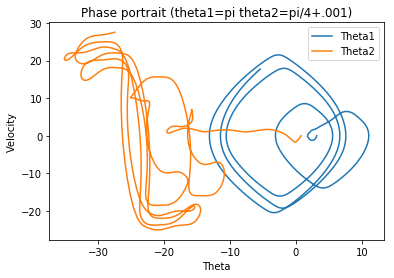

In [110]:
plt.plot(theta1,w1,label='Theta1')
plt.plot(theta2,w2,label='Theta2')
plt.xlabel('Theta')
plt.ylabel('Velocity')
plt.title('Phase portrait (theta1=pi theta2=pi/4+.001)')
plt.legend()

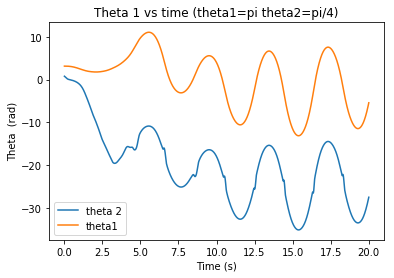

In [111]:
plt.plot(t,theta2,label='theta 2')
plt.plot(t,theta1,label='theta1')
plt.xlabel('Time (s)')
plt.ylabel('Theta  (rad)')
plt.title('Theta 1 vs time (theta1=pi theta2=pi/4)')
plt.legend()



Text(0.5,1,'energy vs time')

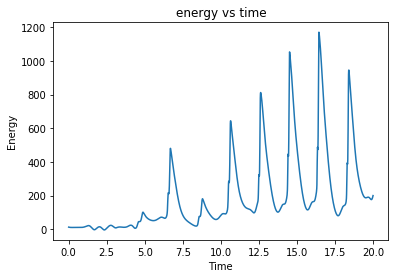

In [112]:
plt.plot(t,E)
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('energy vs time')